In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [0]:
dataset1= '/content/drive/My Drive/courses/data analytics/datasets/Pokemon.csv'
dataset2= '/content/drive/My Drive/courses/data analytics/datasets/googleplaystore.csv'
dataset3= '/content/drive/My Drive/courses/data analytics/datasets/weather.csv'
dataset4='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

In [0]:
pokemon = pd.read_csv(dataset1,
                      encoding='latin1',
                      index_col='#')
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [0]:
pokemon.shape

(151, 12)

In [0]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
Name         151 non-null object
Type 1       151 non-null object
Type 2       67 non-null object
Total        151 non-null int64
HP           151 non-null int64
Attack       151 non-null int64
Defense      151 non-null int64
Sp. Atk      151 non-null int64
Sp. Def      151 non-null int64
Speed        151 non-null int64
Stage        151 non-null int64
Legendary    151 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


In [0]:
pokemon.Legendary.value_counts()

False    147
True       4
Name: Legendary, dtype: int64

In [0]:
pokemon[pokemon.Legendary==True]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True


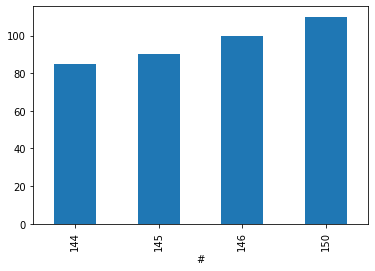

In [0]:
pokemon[pokemon.Legendary==True]['Attack'].plot.bar()

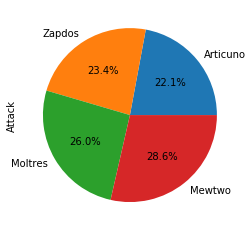

In [0]:
pokeLegend = pokemon[pokemon.Legendary == True]
pokeLegend['Attack'].plot.pie(labels=pokeLegend['Name'], autopct='%.1f%%')
plt.show()

In [0]:
pokemon[pokemon['Type 1'] == 'Grass']['Type 2'].value_counts()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False
44,Gloom,Grass,Poison,395,60,65,70,85,75,40,2,False
45,Vileplume,Grass,Poison,490,75,80,85,110,90,50,3,False
69,Bellsprout,Grass,Poison,300,50,75,35,70,30,40,1,False
70,Weepinbell,Grass,Poison,390,65,90,50,85,45,55,2,False
71,Victreebel,Grass,Poison,490,80,105,65,100,70,70,3,False


In [0]:
pokemon['Type 2'].nunique()

11

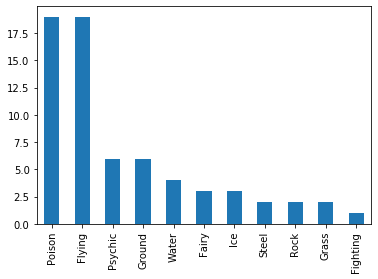

In [0]:
pokemon['Type 2'].value_counts().plot.bar()

In [0]:
pokemon[pokemon['Type 2'].isnull()] # non hybrid

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False


In [0]:
pokemon[~pokemon['Type 2'].isnull()] # hybrid

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False
12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
142,Aerodactyl,Rock,Flying,515,80,105,65,60,75,130,1,False
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True


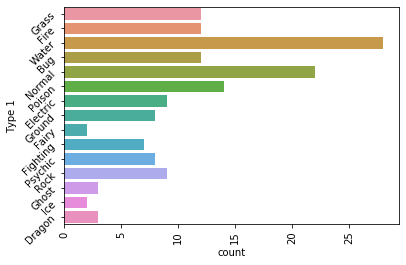

In [0]:
sns.countplot(y='Type 1',data=pokemon)
plt.yticks(rotation=45)
plt.show()

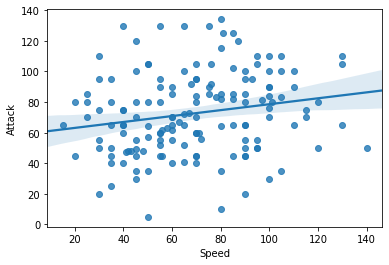

In [0]:
sns.regplot(x='Speed',y='Attack',data=pokemon)

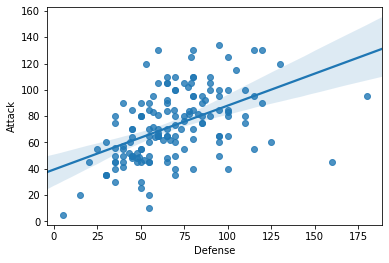

In [0]:
sns.regplot(x='Defense',y='Attack',data=pokemon)

In [0]:
sortedPK = pokemon.sort_values('Type 1')

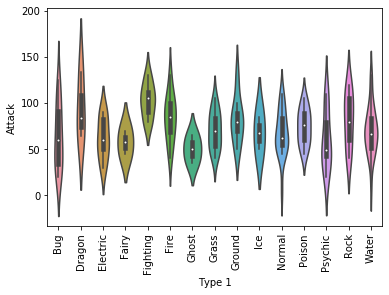

In [0]:
sns.violinplot(x='Type 1',y='Attack',data=sortedPK)
plt.xticks(rotation=90)
plt.show()

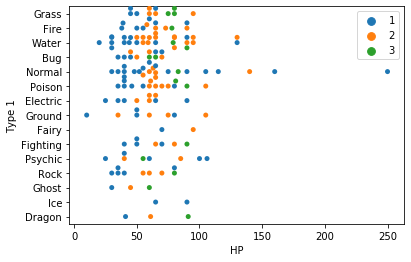

In [0]:
sns.swarmplot(y='Type 1',x='HP',hue='Stage',data=pokemon)
plt.legend(loc='upper right')

In [0]:
weather = pd.read_csv(dataset3,
                      parse_dates=['Date/Time'],
                      dayfirst = True,
                      index_col='Date/Time')
weather.head()

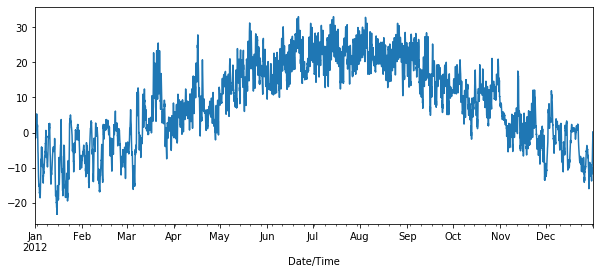

In [0]:
weather['Temp (C)'].plot(figsize=(10,4))

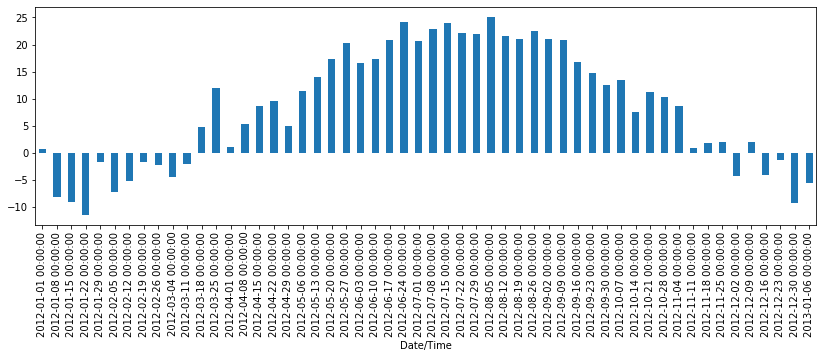

In [0]:
weather['Temp (C)'].resample('W').mean().plot.bar(figsize=(14,4))
plt.show()

In [0]:
weather.loc[weather['Temp (C)'].idxmax()]

Temp (C)                        33
Dew Point Temp (C)              19
Rel Hum (%)                     44
Wind Spd (km/h)                 24
Visibility (km)               24.1
Stn Press (kPa)              100.2
Weather               Mainly Clear
Name: 2012-06-21 15:00:00, dtype: object

In [0]:
weather['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Haze                                         16
Thunderstorms,Rain Showers                   16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [0]:
weather[weather['Weather']=='Snow']

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-03 07:00:00,-14.0,-19.5,63,19,25.0,100.95,Snow
2012-01-04 12:00:00,-13.7,-21.7,51,11,24.1,101.25,Snow
2012-01-04 14:00:00,-11.3,-19.0,53,7,19.3,100.97,Snow
2012-01-04 15:00:00,-10.2,-16.3,61,11,9.7,100.89,Snow
2012-01-04 16:00:00,-9.4,-15.5,61,13,19.3,100.79,Snow
...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow


In [0]:
snowFilter = weather['Weather'].str.contains('Snow')

In [0]:
weather[snowFilter]['Temp (C)'].plot(style='ro') # ugly

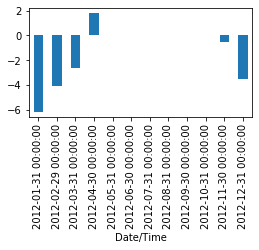

In [0]:
weather[snowFilter]['Temp (C)'].resample('M').mean().plot.bar(figsize=(4,2))

In [0]:
weather['Wind Spd (km/h)'].mean()

14.94546903460838

In [0]:
windFilter = weather['Wind Spd (km/h)'] < 5

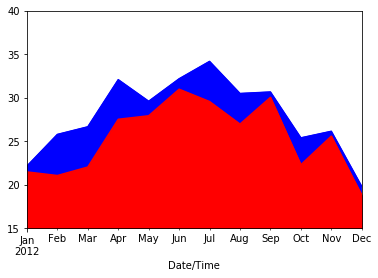

In [0]:
ax = weather[~windFilter]['Visibility (km)'].resample('M').mean().plot(kind='area',color='blue',)
weather[windFilter]['Visibility (km)'].resample('M').mean().plot(kind='area',color='red',)
plt.ylim([15,40])
plt.show()

In [0]:
playstore = pd.read_csv(dataset2,parse_dates=['Last Updated'])


In [72]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [73]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [74]:
playstore[playstore.Reviews.str.contains('M')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [0]:
def removeM(item):
    return item[:-1] if 'M' in item else item
playstore.Reviews = playstore.Reviews.apply(removeM) # remove strings
playstore.Reviews = playstore.Reviews.astype(float) # change datatype

In [0]:
def cleanSizeColumn(item):
    if item.isnumeric():
        return float(item)
    elif '+' in item:
        return float(item[:-1].replace(',',''))
    elif 'M' in item:
        return float(item[:-1])
    elif 'k' in item:
        return float(item[:-1])
    else:
        return item

In [0]:
playstore['Size'] = playstore['Size'].apply(cleanSizeColumn)

In [0]:
playstore['Size'].replace('Varies with device',np.nan,inplace=True)
size_mean = playstore.Size.astype(float).mean()

In [0]:
playstore.Size.replace(np.nan,size_mean,inplace=True)
playstore.Size = playstore.Size.astype(float)

In [80]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [81]:
playstore.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [0]:
most_freq_val = playstore.Category.value_counts().idxmax()
playstore.Category.replace('1.9',most_freq_val,inplace=True)

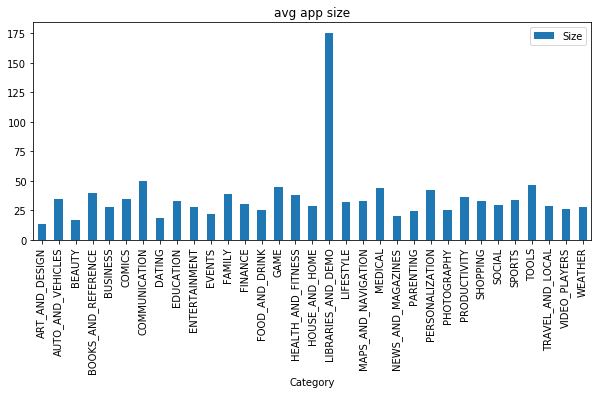

In [83]:
playstore[['Category','Size']].groupby('Category').mean().plot.bar(figsize=(10,4),title='avg app size')
plt.show()

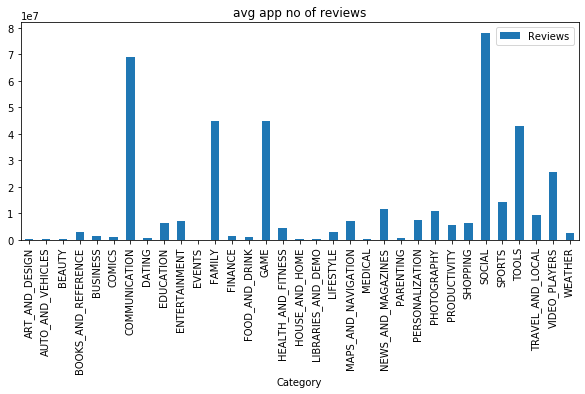

In [84]:
playstore[['Category','Reviews']].groupby('Category').max().plot.bar(figsize=(10,4),title='avg app no of reviews')
plt.show()

In [85]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null float64
Size              10841 non-null float64
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(3), object(10)
memory usage: 1.1+ MB
